<a href="https://colab.research.google.com/github/Zerzavot/GlobalAIHubDLCourse/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
Linear regression is used to construct a linear relationship between input variable(s) and an output variable.

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_kx_k$$


Lets use the following data for exercises

### Simple Linear Regression

When there is only one input variable it is called simple linear regression

$$y = \beta_0 + \beta_1x$$


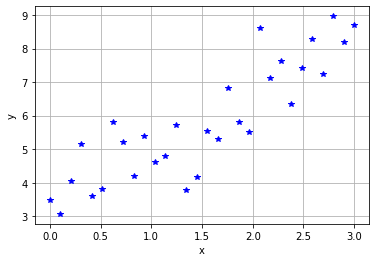

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x = np.linspace(0,3,30)
y = 2*x + 3 + np.random.randn(x.size)

plt.plot(x,y,"*b")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

**Exercise**

Given an input vector $x$ and coefficient vector $\beta_0$ and $\beta_1$ calculate and return predicted values of $\hat{y}$ using following formula 
$$\hat{y} = \beta_0 + \beta_1x$$

In [ ]:
def predict_first(x,beta0,beta1):
    return beta0 + beta1*x

In [ ]:
beta0 = 1
beta1 = 2

ypred = predict_first(x, beta0, beta1)
print(ypred[5])

2.0344827586206895


**Exercise**

In the second problem, you are going to predicted the $\hat{y}$ values again. but this time you are going to use matrix multiplication. Assume you have an input matrix $X$ of shape $m*k$ and parameter vector $\beta$ of size $k$. Calculate the predictions as follows:
$$\hat{y} = X\beta $$
Use the `np.dot()` function for matrix multiplication

For the given dataset, you need to add columns of ones to the input vector $x$ so you will have a matrix of shape $30*2$. You can use `np.c_[]` function to combine vectors or matrices.


In [ ]:
X = np.c_[np.ones(x.shape), x]  # write your command here

print(X[3,:])
# should printout [1.         0.31034483]

[1.         0.31034483]


In [ ]:
def predict(X,beta):
    return np.dot(X,beta)

In [ ]:
np.random.seed(42)
beta = np.random.random(X.shape[1])
yhat = predict(X,beta)
print(yhat[5])
# should printout 0.8662888980249054

0.8662888980249054


## Evaluation Metrics

Evaluation metrics are used to measure the goodness of a model. For regression models a few of the performance metrics are listed below:

### Mean Squared Error (MSE)

$$mse = \frac{1}{n}\sum_{i=1}^{n} (y^i - \hat{y}^i)^2$$

### Mean Absoulte Error (MAE)

$$mae = \frac{1}{n}\sum_{i=1}^{n} |y^i - \hat{y}^i|$$


### Mean Absolute Percentage Error (MAPE)

$$mape = \left(\frac{1}{n}\sum_{i=1}^{n} \frac{|y^i - \hat{y}^i|}{|y^i|}\right)*100$$

### $R^2$ Score

$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum(y^i-\hat{y}^i)^2}{\sum(y^i - \bar{y})^2}$$

**Exercise**

Write a function to calculate the performance functions

In [ ]:
def mse(y,ypred):
    return np.mean((y- ypred)**2)

def mae(y,ypred):
    return np.mean(np.abs(y-ypred))

def mape(y,ypred):
    return np.mean(np.abs(y-ypred)/np.abs(y))*100

## Homework Problem 1
def r2 (y, ypred):
    pass

In [ ]:
np.random.seed(42)
beta = np.random.random(X.shape[1])
yhat = predict(X,beta)

print("mse :", mse(y,yhat))
print("mae :", mae(y,yhat))
print("mape :", mape(y,yhat))

mse : 17.18425929439018
mae : 4.011241525686726
mape : 70.24040053349047


## Gradient Descent

Gradient descent is a nonlinar optimization algorithm which can be used to calculate the parameters of a regression model. 
Assume you have a linear regression model below

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_kx_k$$

and the loss function defined as 
$$L = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y}^i - y^i)^2$$

gradients of $\beta_i$ can be calculated as follows:

$$\frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}^i - y^i)$$
$$\frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}^i - y^i)x_{1}^î$$
$$\vdots$$
$$\frac{\partial L}{\partial \beta_k} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}^i - y^i)x_{k}^i$$

**Exercise**

Write a function that will calculate the derivative of parameters. Input parameters of your function should be; input matrix $X$ of shape $n*k$, target variable vector $y$ of size $n$ and the coefficient vector $\beta$ of size $k$. Your output should be gradient vector of coefficients $\partial L/\partial \beta$ of size $k$

In [ ]:
def gradient_beta(X,y,beta):
    ypred = predict(X, beta)
    return np.dot(X.T, ypred - y)/y.size

In [ ]:
np.random.seed(42)
beta = np.random.random(X.shape[1])
beta_grad = gradient_beta(X,y,beta)
print(beta_grad)

[-4.01124153 -6.58576749]


Parameters are updated according to following formula

$$\beta_0^{new} = \beta_0^{old} - \alpha\frac{\partial L}{\partial \beta_0}$$
$$\beta_1^{new} = \beta_1^{old} - \alpha\frac{\partial L}{\partial \beta_1}$$
$$\vdots$$
$$\beta_k^{new} = \beta_k^{old} - \alpha\frac{\partial L}{\partial \beta_k}$$

In [ ]:
def update_weights(beta, gradient_beta, alpha):
    return beta - alpha*gradient_beta

    
np.random.seed(42)
beta = np.random.random(X.shape[1])
dbeta = gradient_beta(X,y,beta)
alpha = 0.1
update_weights(beta,dbeta, alpha)

array([0.77566427, 1.60929106])

The pseudocode for gradient descent algorithm can be summarized below

1. Initialize random values for parameters
2. Calculate the gradients
3. Update parameters
4. Repeat steps 2-3

**Exercise**

Now you need to combine all the components together to estimate the coefficients of a linear model. Input parameters of the function will be input matrix $X$ of shape $n*k$ and target vector $y$ of size $n$. Learning parameter $\alpha$ and maximum number of iterations

In [ ]:
def model_fit(X,y,alpha,max_iter):
    beta = np.random.random(X.shape[1])
    for i in range(max_iter):
        beta_grad = gradient_beta(X,y,beta)
        beta = update_weights(beta, beta_grad, alpha)
    
    return beta

model_fit(X,y,0.1,1000)

array([3.32137836, 1.6603165 ])

## Ordinary Least Squares

Another way to calculate the parameters of the linear regression is to used normal function as follows:

$$\beta = (X^TX)^{-1}X^Ty$$

**Exercise**

In [ ]:
def model_fit_ols(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

model_fit_ols(X,y)

array([3.32137836, 1.6603165 ])

## Regularization

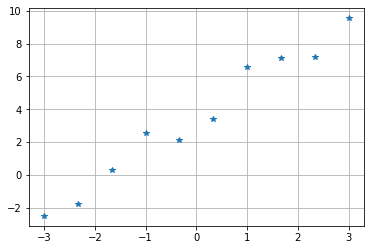

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

np.random.seed(42)
x = np.linspace(-3,3,10)
y = 2*x + 3 + np.random.randn(x.size)

plt.plot(x,y, "*")
plt.grid()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+01, tolerance: 1.499e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Train: 0.9218125843449034
Test:  0.9003815454157585


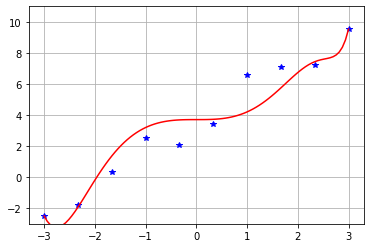

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


x_test = np.linspace(-3,3,100)
y_test = 2*x_test + 3
#mdl = LinearRegression()
mdl =  Lasso(alpha =  1)
def fun(k):
    poly = PolynomialFeatures(degree=k)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    x_test_poly = poly.transform(x_test.reshape(-1,1))
    mdl.fit(x_poly,y)  
    ypred = mdl.predict(x_test_poly)
    plt.plot(x,y, "*b")  
    plt.plot(x_test, ypred, "r")
    plt.ylim([-3,11])
    plt.grid()
    print("Train:", r2_score(y, mdl.predict(x_poly)))
    print("Test: ", r2_score(y_test,ypred))

fun(13)

In [ ]:
import pandas as pd

house = pd.read_csv("house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = house[["LotArea", "Street", "LandSlope", "SalePrice"]]
df.head()

,LotArea,Street,LandSlope,SalePrice
0,8450,Pave,Gtl,208500
1,9600,Pave,Gtl,181500
2,11250,Pave,Gtl,223500
3,9550,Pave,Gtl,140000
4,14260,Pave,Gtl,250000


In [ ]:
df.isnull().sum()

LotArea      0
Street       0
LandSlope    0
SalePrice    0
dtype: int64

In [ ]:
X = df[["LotArea", "Street", "LandSlope"]]
y = df["SalePrice"]
X["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [ ]:
mdl = LinearRegression()
X = pd.get_dummies(X, drop_first = True)
X.head()
mdl.fit(X,y)
print(mdl.coef_)
print(mdl.intercept_)

[ 0.00000000e+00  2.92775816e+00  1.23040019e+05  7.58330785e+03
 -1.34993174e+05]
28460.47299016008


In [ ]:
X.head()

,LotArea,Street_Pave,LandSlope_Mod,LandSlope_Sev
0,8450,1,0,0
1,9600,1,0,0
2,11250,1,0,0
3,9550,1,0,0
4,14260,1,0,0


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
mdl = sm.OLS(y, X)
mdl = mdl.fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     39.30
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.79e-31
Time:                        13:24:45   Log-Likelihood:                -18469.
No. Observations:                1460   AIC:                         3.695e+04
Df Residuals:                    1455   BIC:                         3.697e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.846e+04   3.22e+04      0.882